# Importing important libraries

In [62]:
import tweepy,re
from textblob import TextBlob #used in processing textualized data and finding sentiment of the tweets.
import matplotlib.pyplot as plt #to visualize the data
import pandas as pd
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer #this library is used in lemmatization process to convert the words into its base form
from nltk.corpus import stopwords #to remove stopwords such 'as the, he, she, it' and make the sentence understandable to the machine.

# Authentication for gaining access to tweets data using twitter API

In [63]:
#A twitter developer's account is needed for generating the credentials as mentioned below. To create a developers account, the user should have an existing twitter account.
# authentication
consumerKey = 'KhocKucswsDBocThtJejLpwsP'
consumerSecret = 'Koen5rkYmrrMINVHwqTXKIeGeSvwmpxNQcy2CiTKixgNKprx3I'
accessToken = '1386718586652213256-8DoxOYGWcDsIaBjMwCZIN7Hf3bYNOa'
accessTokenSecret = 'kxlwH0OWvnI1z723lawhvUhp29LyFAnfpasx3kwckV9Zq'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth) 

In [64]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []
# searching for tweets
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm+" -filter:retweets", lang = "en").items(NoOfTerms)

Enter Keyword/Tag to search about: barack obama
Enter how many tweets to search: 70


In [65]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,"@RinoRooter @jhaskinscabrera Yeah, the 'world ..."
1,plz subscribe to Barack obama on YouTube!!
2,A reason why Barack Obama 's past is sealed an...
3,"Money is not the only answer, but it makes a d..."
4,Which world leader was awarded the prestigious...
...,...
65,"Kevin McCarthy... ""Only two American president..."
66,Barack Obama's Poor Understanding of the Const...
67,I purchased Author Barack Obama's #APromisedLa...
68,"On page 222 of 767 of A Promised Land, by Bara..."


# Cleaning the Data obtained 

In [41]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [42]:
tweet_df.head()

,0,cleaned_data
0,He has already started historical awareness po...,He has already started historical awareness po...
1,@CaptainAbhi_IND @therajputgaurav @twitspacetw...,IND than why some folks are disturbing them to...
2,@Abdulmajeedbnr @yogirajshakya BTW India is a ...,BTW India is a secular country bro where you c...
3,@Aharyanvi1 I don't know why some people remem...,I don t know why some people remembers muslims...
4,@Dahiy2Dharamvir @AriebAamna @samar11 @Aakar__...,Patel This is not true Absolutely wrong statem...


In [43]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [44]:
tweet_df.head()

,0,cleaned_data
0,He has already started historical awareness po...,He has already started historical awareness po...
1,@CaptainAbhi_IND @therajputgaurav @twitspacetw...,IND than why some folks are disturbing them to...
2,@Abdulmajeedbnr @yogirajshakya BTW India is a ...,BTW India is a secular country bro where you c...
3,@Aharyanvi1 I don't know why some people remem...,I don t know why some people remembers muslims...
4,@Dahiy2Dharamvir @AriebAamna @samar11 @Aakar__...,Patel This is not true Absolutely wrong statem...


In [45]:
# changing all the words of the reviews column to lowercase letters
import nltk
nltk.download('punkt')
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [48]:
tweet_df['cleaned_data'].values

array(['he ha already started historical awareness politics on few topic like bhagat singh ambedkar recently ganesh cha',
       'ind than why some folk are disturbing them to offer the',
       'btw india is a secular country bro where you can offer your prayer any person in t',
       'i don t know why some people remembers muslim always for nonveg or loud speaker we hindu eat non v',
       'patel this is not true absolutely wrong statement your source of in',
       'nobody chant satanic terrorizing rant during ganesh chaturthi so st',
       'ind a we celebrate ganesh chaturthi and navaratri for day blocking road similarly y',
       'street procession is a different thing and sorry to break exaggeration it can not be done d',
       'sayema will also not acknowledge all the incident of puja pandals temple who have happily accepted namaz all thes',
       'ganesh chaturthi janmastami holi ramayan amp mahabharat katha time this are the example',
       'maurya it is not a matter th

In [49]:
import nltk
nltk.download('stopwords')
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
tweet_df['cleaned_data'].values

array(['ha already started historical awareness politics topic like bhagat singh ambedkar recently ganesh cha',
       'ind folk disturbing offer',
       'btw india secular country bro offer prayer person',
       'know people remembers muslim always nonveg loud speaker hindu eat non v',
       'patel true absolutely wrong statement source',
       'nobody chant satanic terrorizing rant ganesh chaturthi st',
       'ind celebrate ganesh chaturthi navaratri day blocking road similarly',
       'street procession different thing sorry break exaggeration done',
       'sayema also acknowledge incident puja pandals temple happily accepted namaz thes',
       'ganesh chaturthi janmastami holi ramayan amp mahabharat katha time example',
       'maurya matter practicing religion road every',
       'ind ganesh chaturthi wa started bal gangadhar tilak promote nationalism towards ci',
       'ind use road ganesh chaturthi dasara week fellow indian namaz',
       'ganesh chaturthi classic bhog 

# Creating a Sentiment analyzer engine 

In [51]:
# Lets calculate the Polarity of the Reviews
#Polarity is the expression which determines the sentimental aspect of an opinion. 
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [52]:
tweet_df['polarity'].value_counts()

Neutral              25
Weakly Positive      11
Negative              5
Strongly Positive     5
Weakly Negative       2
Strongly Negative     1
Positive              1
Name: polarity, dtype: int64

In [53]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [55]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,50): #make sure to change the range according to the number of tweets taken in consideration.
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [56]:
# finding average reaction
polarity = polarity / NoOfTerms
polarity

0.052726551226551226

In [57]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [58]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)



In [59]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on ganesh chaturthi by analyzing 50 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
2.00% people thought it was positive
22.00% people thought it was weakly positive
10.00% people thought it was strongly positive
10.00% people thought it was negative
4.00% people thought it was weakly negative
2.00% people thought it was strongly negative
50.00% people thought it was neutral


# Visualizing the Data

In [60]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['lightgreen','red','lightsalmon', 'yellowgreen', 'lightyellow','darkred','yellow']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

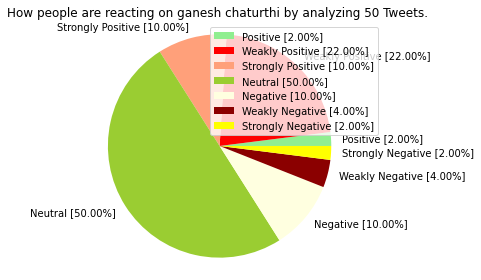

In [61]:
#to visualize our data in the form of pie chart neatly.
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()